# Python Practice
This material is adapted from the following,
- [Scikit Learn](http://scikit-learn.org/stable/)  
- [Sebastian Raschka](https://github.com/rasbt/python-machine-learning-book)  
- [Jake Vanderplas](https://github.com/jakevdp/sklearn_tutorial)
- [Andreas Mueller](http://amueller.github.io)  
- [Kyle Kastner](https://kastnerkyle.github.io/)  
- [Quantopian Research](https://github.com/quantopian/research_public)
- [Python for Probability, Statistics, and Machine Learning](http://www.springer.com/fr/book/9783319307152), [github](https://github.com/unpingco/Python-for-Probability-Statistics-and-Machine-Learning)

## Imports

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext line_profiler

# Ignore Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from helper_functions import tic, toc

""" Include Parent Directory in Python Path """
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Practice with Python

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Always set your seed value, so that you can replicate your work under the same random number conditions.

In [51]:
np.random.seed(123)

In [52]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns # Use seaborn. It looks nicer

## Always plot "inline" when presenting your work

In [53]:
%matplotlib inline

In [54]:
t = np.linspace(0, 1, 100)  # 100 equally spaced array of numbers from 0.0 to 1
y = np.sin(2 * np.pi * t)  # take sine of the value

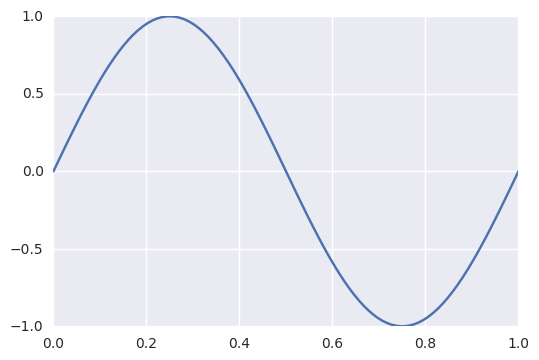

In [55]:
plt.plot(t, y);

## Use Pandas to read common file types

In [15]:
import pandas as pd

In [16]:
sp500_constituents = pd.read_csv('http://data.okfn.org/data/core/s-and-p-500-companies/r/constituents.csv')
sp500_constituents.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,ABT,Abbott Laboratories,Health Care
2,ABBV,AbbVie,Health Care
3,ACN,Accenture plc,Information Technology
4,ATVI,Activision Blizzard,Information Technology


In [17]:
sp500_financials = pd.read_csv('http://data.okfn.org/data/core/s-and-p-500-companies/r/constituents-financials.csv')
sp500_financials.head()

,Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,177.12,2.53,22.77,7.78,19.34,134.00,177.79,107.43,8.57,3.52,9.04,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,ABT,Abbott Laboratories,Health Care,41.89,2.55,25.79,1.62,14.10,36.00,51.74,61.54,4.40,2.98,2.93,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABBV,AbbVie,Health Care,64.16,3.60,19.29,3.33,2.87,45.45,71.60,103.77,10.30,4.31,22.09,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ACN,Accenture plc,Information Technology,115.11,1.94,19.45,5.92,11.45,88.43,120.78,71.66,5.42,2.17,9.84,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ATVI,Activision Blizzard,Information Technology,41.29,0.64,37.06,1.11,11.31,24.04,41.32,30.48,1.59,6.16,3.57,http://www.sec.gov/cgi-bin/browse-edgar?action...


## Let's "Group" data by sectors

In [18]:
# Lets aggregate by class and count survival rates
df_grouped = sp500_financials.groupby(by='Sector')

In [60]:
df_grouped['Market Cap'].mean()

Sector
Consumer Discretionary          29.878588
Consumer Staples                63.848571
Energy                          36.000000
Financials                      29.327022
Health Care                     49.820179
Industrials                     28.148143
Information Technology          66.416418
Materials                       20.199259
Telecommunications Services    106.274000
Utilities                       23.362500
Name: Market Cap, dtype: float64

In [61]:
df_grouped['Price/Earnings'].mean()

Sector
Consumer Discretionary         25.300122
Consumer Staples               33.133824
Energy                         94.646429
Financials                     22.590114
Health Care                    40.279615
Industrials                    22.260441
Information Technology         36.860656
Materials                      37.377083
Telecommunications Services    13.565000
Utilities                      25.011200
Name: Price/Earnings, dtype: float64

In [62]:
df_grouped['Price/Book'].mean()

Sector
Consumer Discretionary          8.082222
Consumer Staples               23.665000
Energy                          3.283056
Financials                      6.020440
Health Care                     5.456727
Industrials                     6.847761
Information Technology          6.588281
Materials                       5.511111
Telecommunications Services     3.646000
Utilities                       2.142500
Name: Price/Book, dtype: float64

## Let's "impute" missing values using the median

In [63]:
# now use this grouping to fill the data set in each group, then transform back
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
col_deleted = list(set(sp500_financials.columns) - set(df_imputed.columns))
df_imputed[col_deleted] = sp500_financials[col_deleted]

print (df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 503
Data columns (total 15 columns):
Price             504 non-null float64
Dividend Yield    504 non-null float64
Price/Earnings    504 non-null float64
Earnings/Share    504 non-null float64
Book Value        504 non-null float64
52 week low       504 non-null float64
52 week high      504 non-null float64
Market Cap        504 non-null float64
EBITDA            504 non-null float64
Price/Sales       504 non-null float64
Price/Book        504 non-null float64
Symbol            504 non-null object
Name              504 non-null object
Sector            504 non-null object
SEC Filings       504 non-null object
dtypes: float64(11), object(4)
memory usage: 63.0+ KB
None


In [64]:
df_imputed['Price/Book'].describe()

count    504.000000
mean       7.063859
std       25.502106
min        0.000000
25%        1.920000
50%        3.070000
75%        5.425000
max      442.970000
Name: Price/Book, dtype: float64

In [65]:
df_imputed['Value'] = pd.cut(df_imputed['Price/Book'],[0,1.92,3.07,5.425,442.97],4,labels=['cheap','deal','average','expensive'])
print (df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 503
Data columns (total 16 columns):
Price             504 non-null float64
Dividend Yield    504 non-null float64
Price/Earnings    504 non-null float64
Earnings/Share    504 non-null float64
Book Value        504 non-null float64
52 week low       504 non-null float64
52 week high      504 non-null float64
Market Cap        504 non-null float64
EBITDA            504 non-null float64
Price/Sales       504 non-null float64
Price/Book        504 non-null float64
Symbol            504 non-null object
Name              504 non-null object
Sector            504 non-null object
SEC Filings       504 non-null object
Value             503 non-null category
dtypes: category(1), float64(11), object(4)
memory usage: 63.5+ KB
None


### Drop NaN values (if they still exist after group imputation)

In [66]:
df_imputed.dropna(inplace=True)
print (df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 503
Data columns (total 16 columns):
Price             503 non-null float64
Dividend Yield    503 non-null float64
Price/Earnings    503 non-null float64
Earnings/Share    503 non-null float64
Book Value        503 non-null float64
52 week low       503 non-null float64
52 week high      503 non-null float64
Market Cap        503 non-null float64
EBITDA            503 non-null float64
Price/Sales       503 non-null float64
Price/Book        503 non-null float64
Symbol            503 non-null object
Name              503 non-null object
Sector            503 non-null object
SEC Filings       503 non-null object
Value             503 non-null category
dtypes: category(1), float64(11), object(4)
memory usage: 63.4+ KB
None


## Group by Sector and Value

In [67]:
df_grouped = df_imputed.groupby(by=['Sector','Value'])

## Let's visualize the dataset

In [68]:
plt.style.use('ggplot')

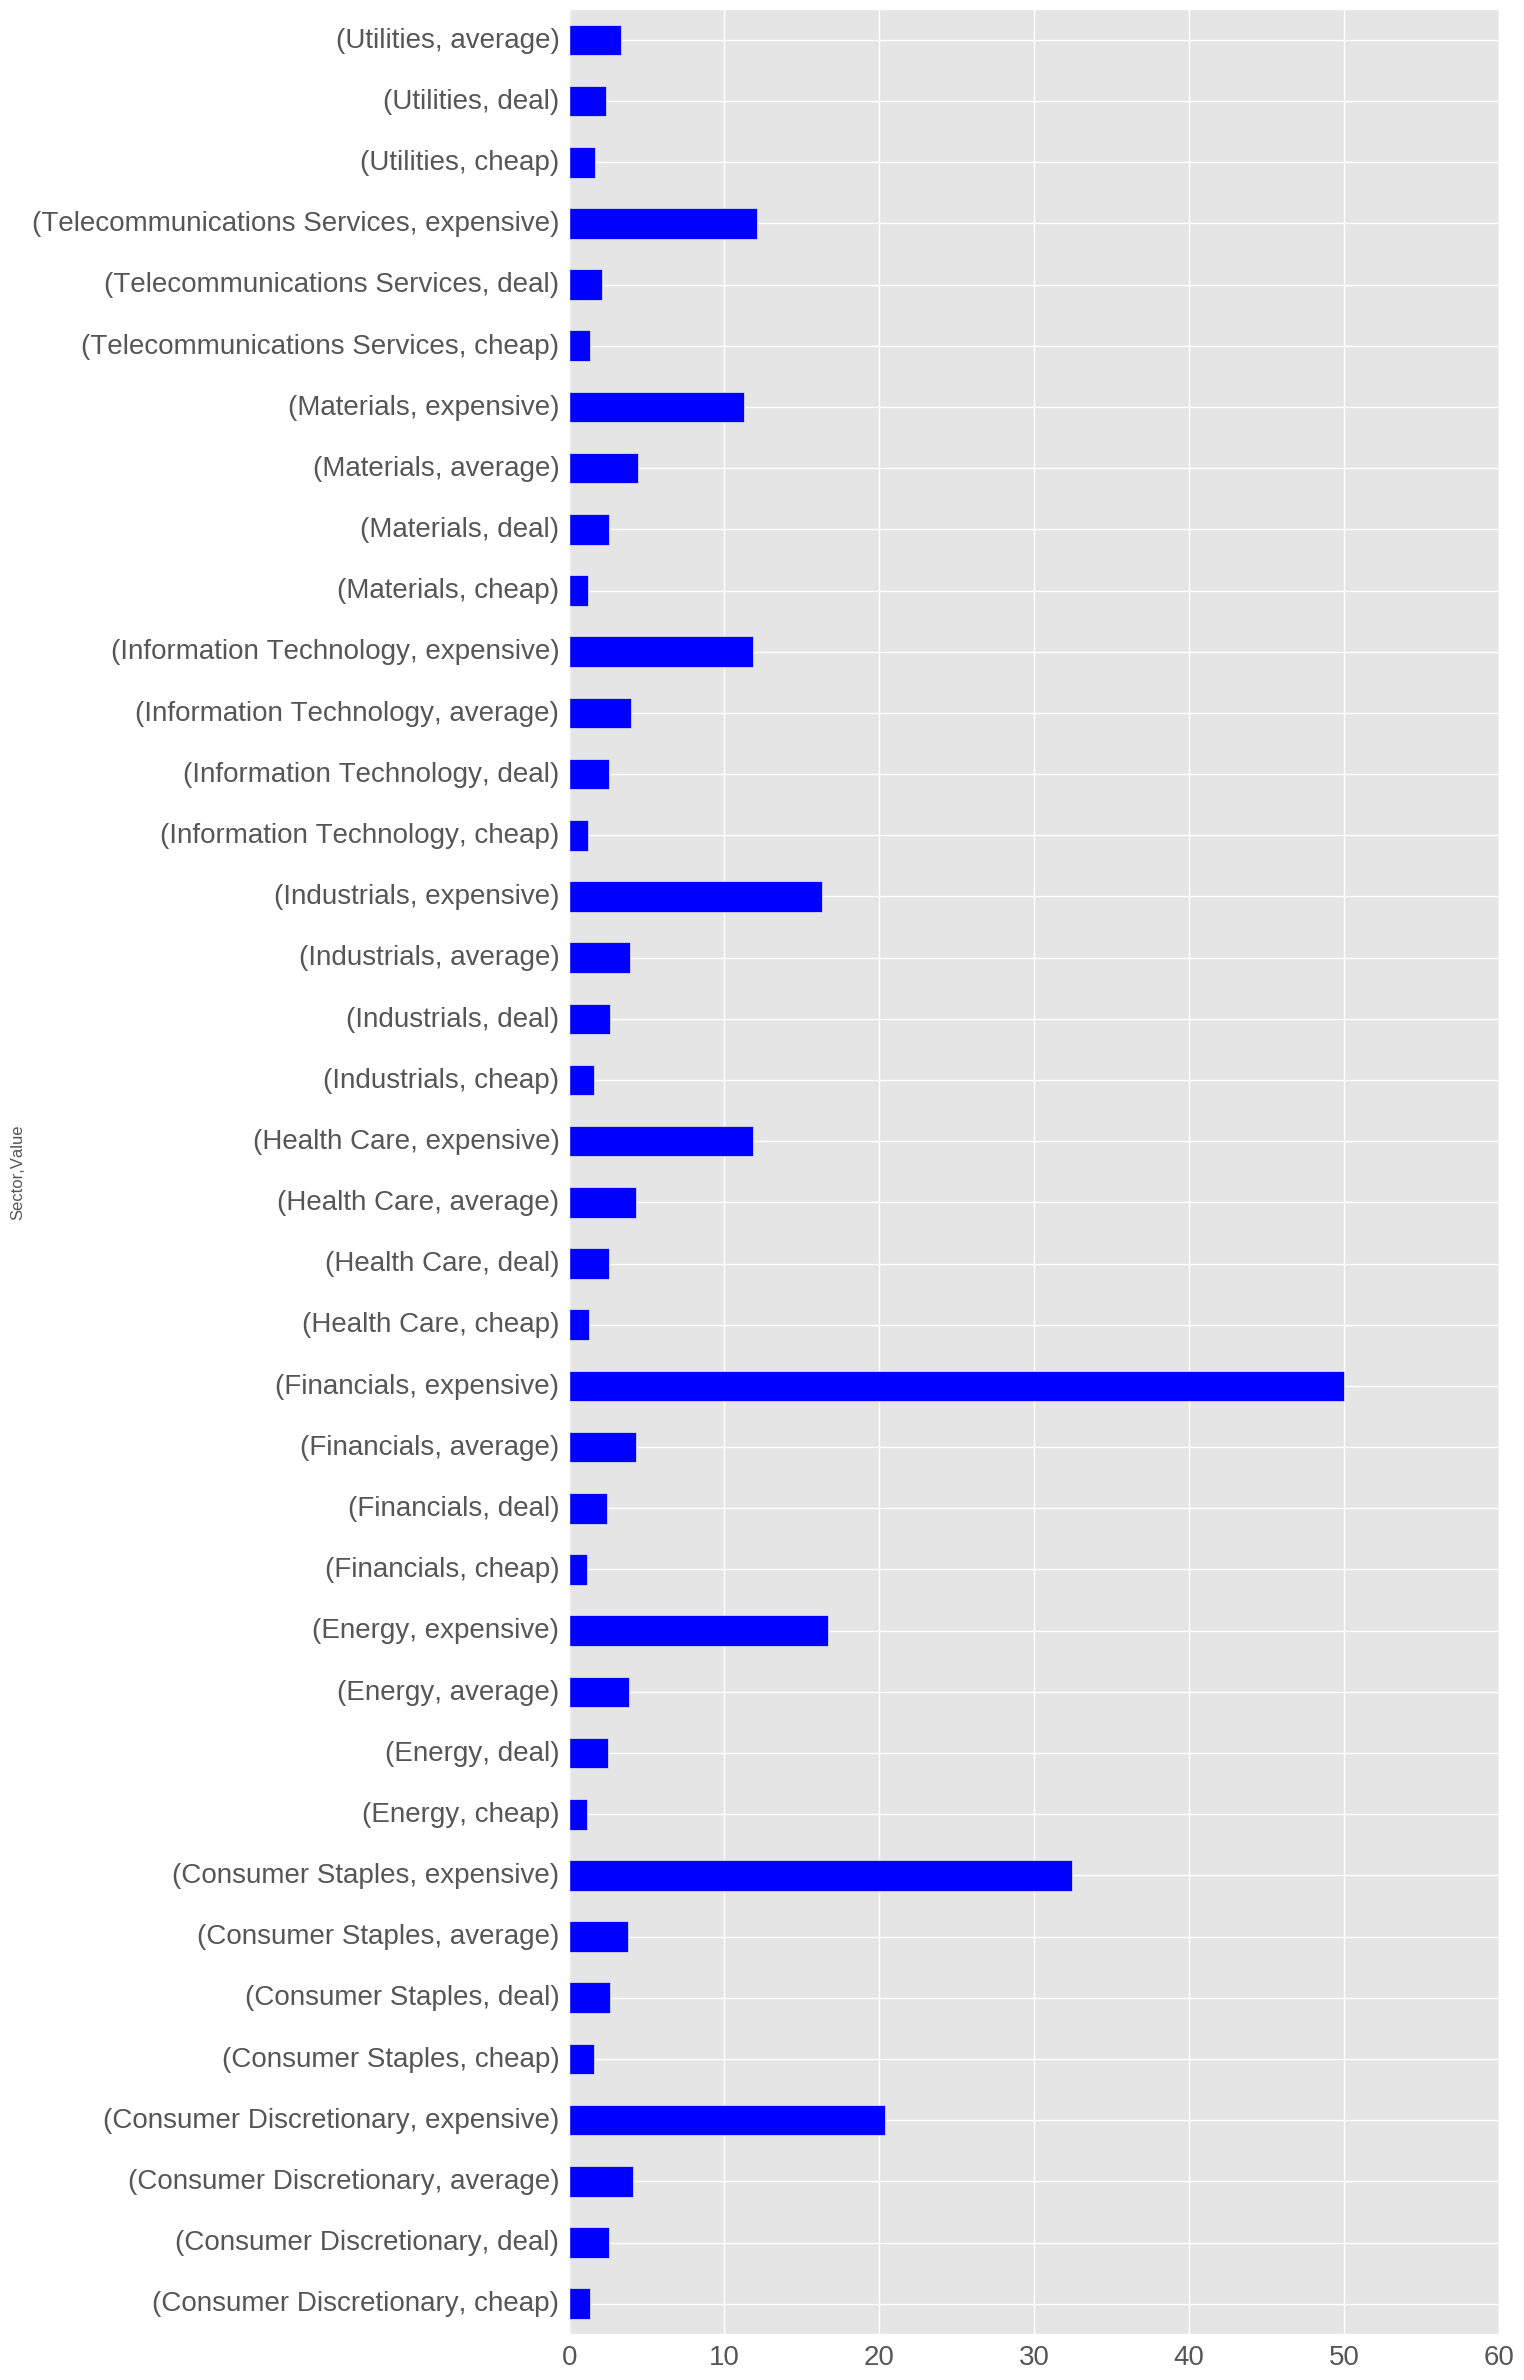

In [69]:
fig,ax = plt.subplots(figsize=(12,30))
ax = df_grouped['Price/Book'].mean().plot(kind='barh',fontsize=20,ax=ax)

## How's the Market Sentiment?

In [70]:
df_imputed['aBuy'] = df_imputed['Value'].isin(['cheap','deal'])

## Crosstabs are always useful for comparisons

In [71]:
sector_value_ct = pd.crosstab(df_imputed['Sector'], 
                              df_imputed['aBuy'].astype(bool))

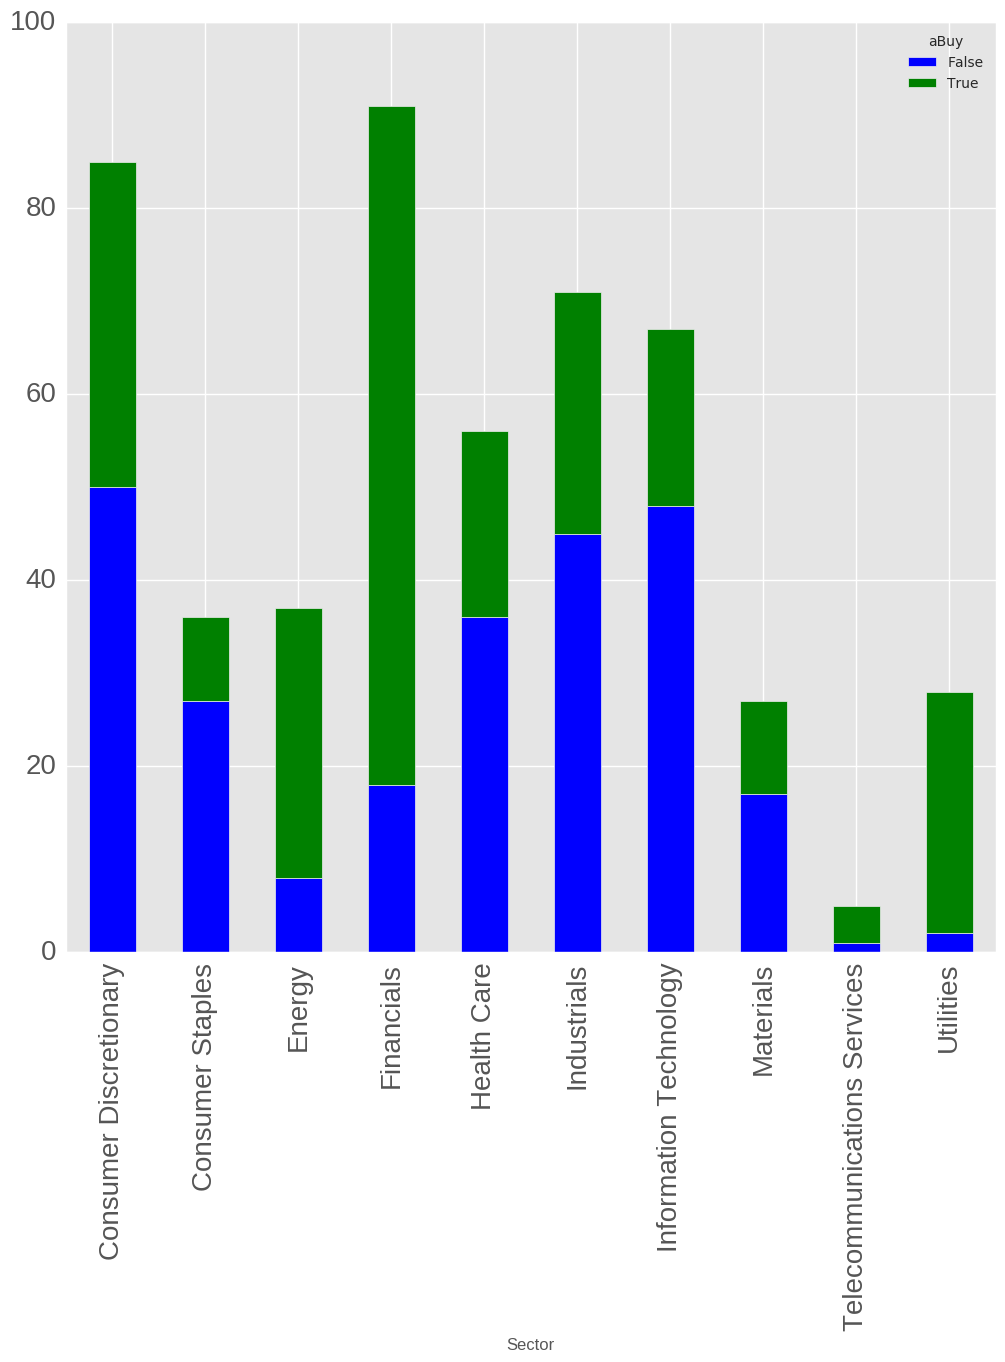

In [72]:
fig,ax = plt.subplots(figsize=(12,12))
ax = sector_value_ct.plot(kind='bar',stacked=True,fontsize=20,ax=ax)

## Normalizing can help visualize the results

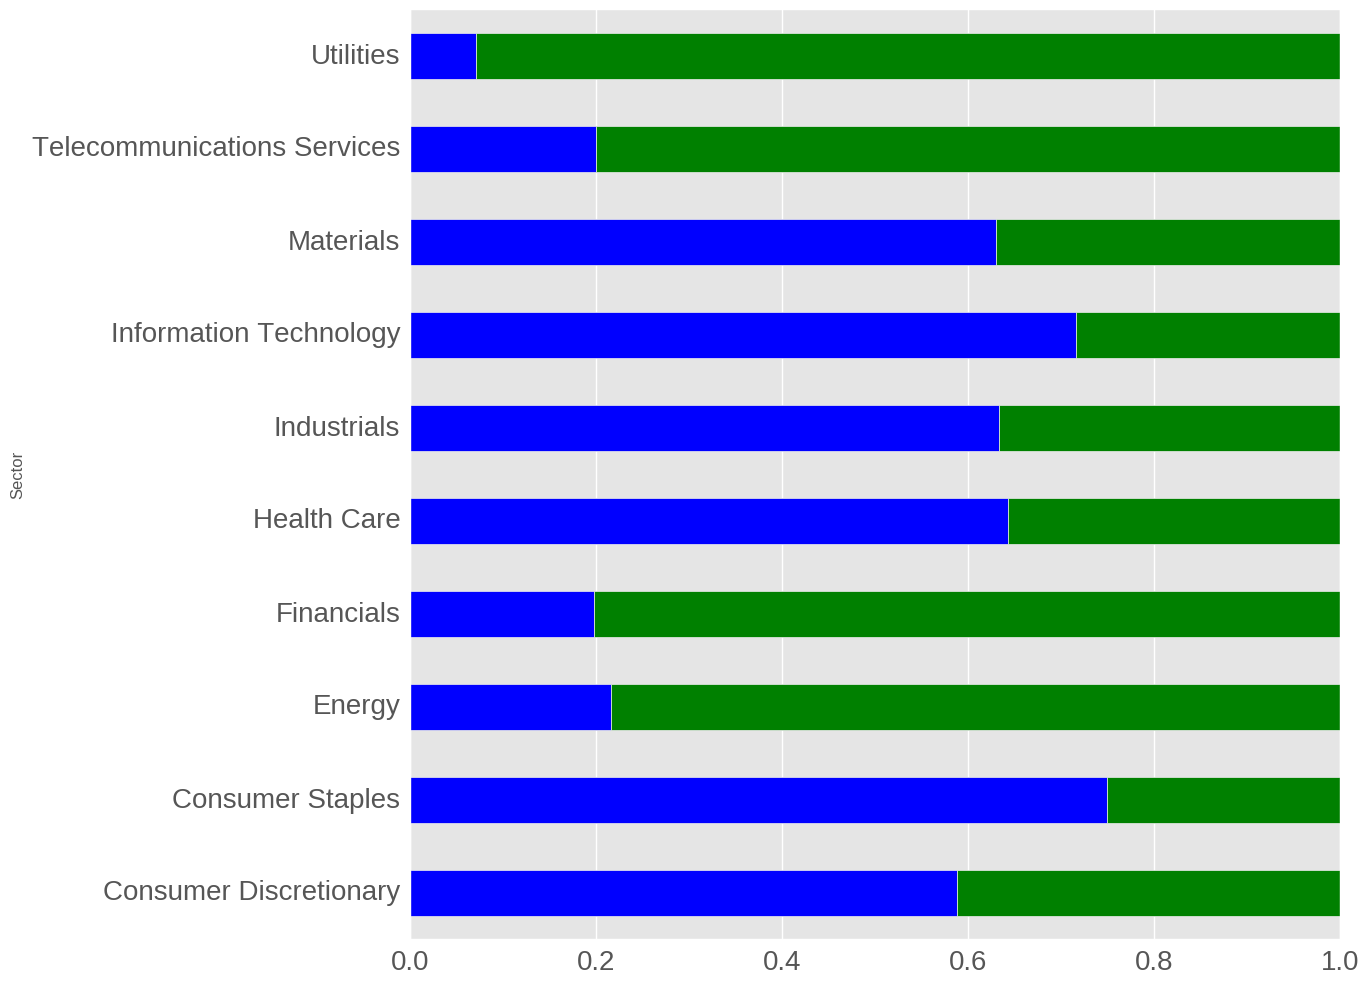

In [73]:
df_normalized = sector_value_ct.div(sector_value_ct.sum(1).astype(float),axis=0)

fig,ax = plt.subplots(figsize=(12,12))
df_normalized.plot(kind='barh', 
                   stacked=True, 
                   fontsize=20, 
                   legend=False,
                   ax=ax);

## Let's look at a pairplot

In [74]:
cmap = sns.diverging_palette(150, 15, as_cmap=True)

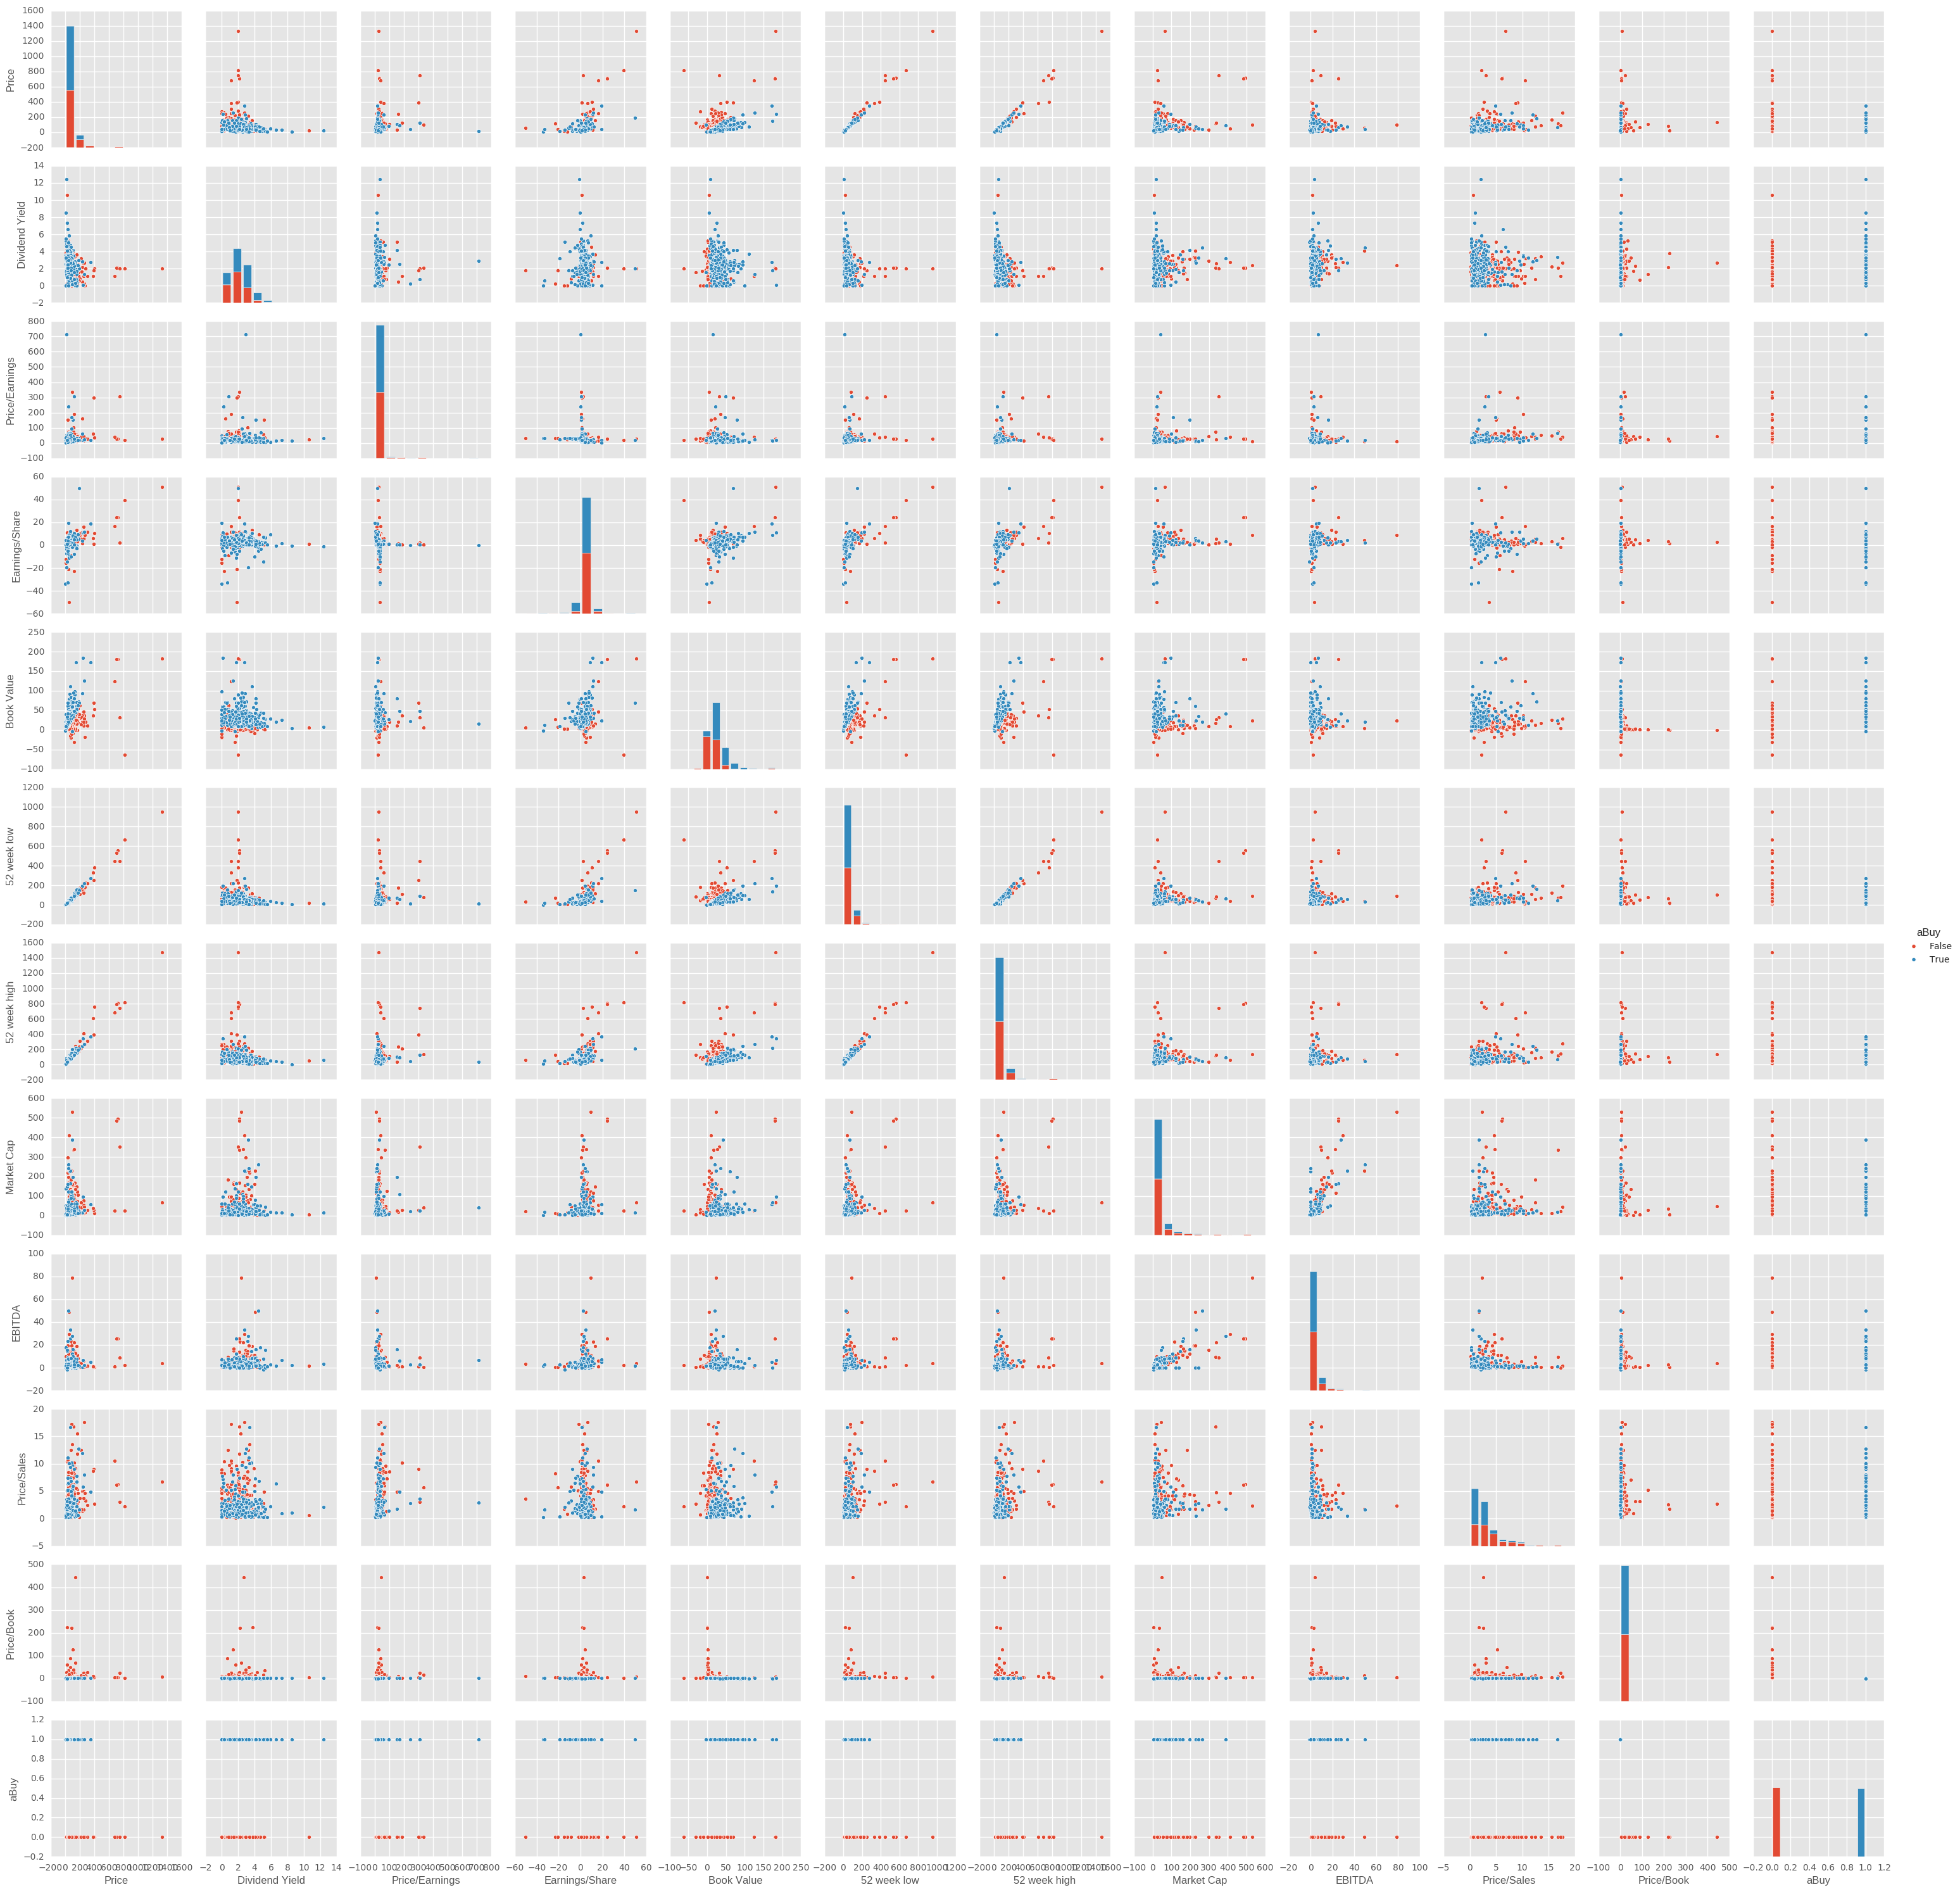

In [75]:
ax = sns.pairplot(df_imputed, hue='aBuy')

## Plot the Correlation Matrix

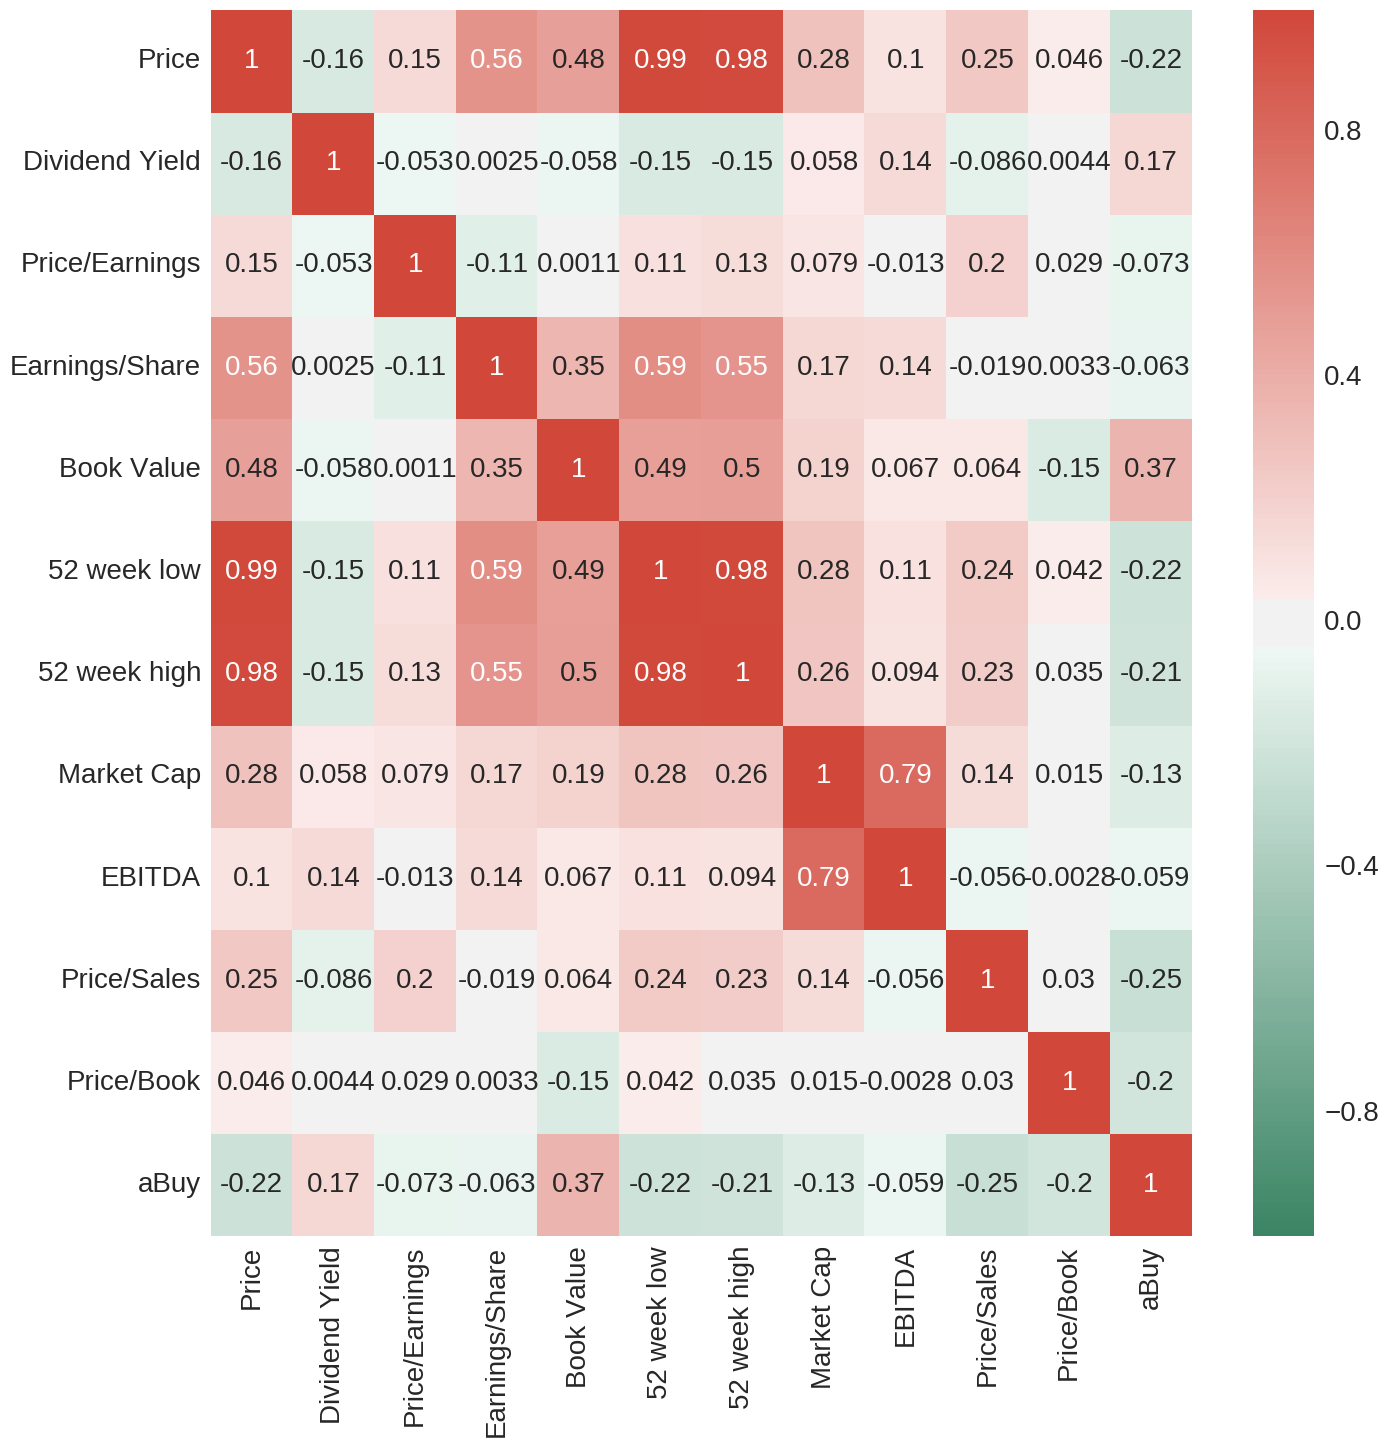

In [76]:
sns.set(style="darkgrid")
sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_imputed.corr(), 
            cmap=cmap, 
            annot=True,
            annot_kws={"size":20},
            ax=ax)
fig.tight_layout()

## What about Earnings/Share?

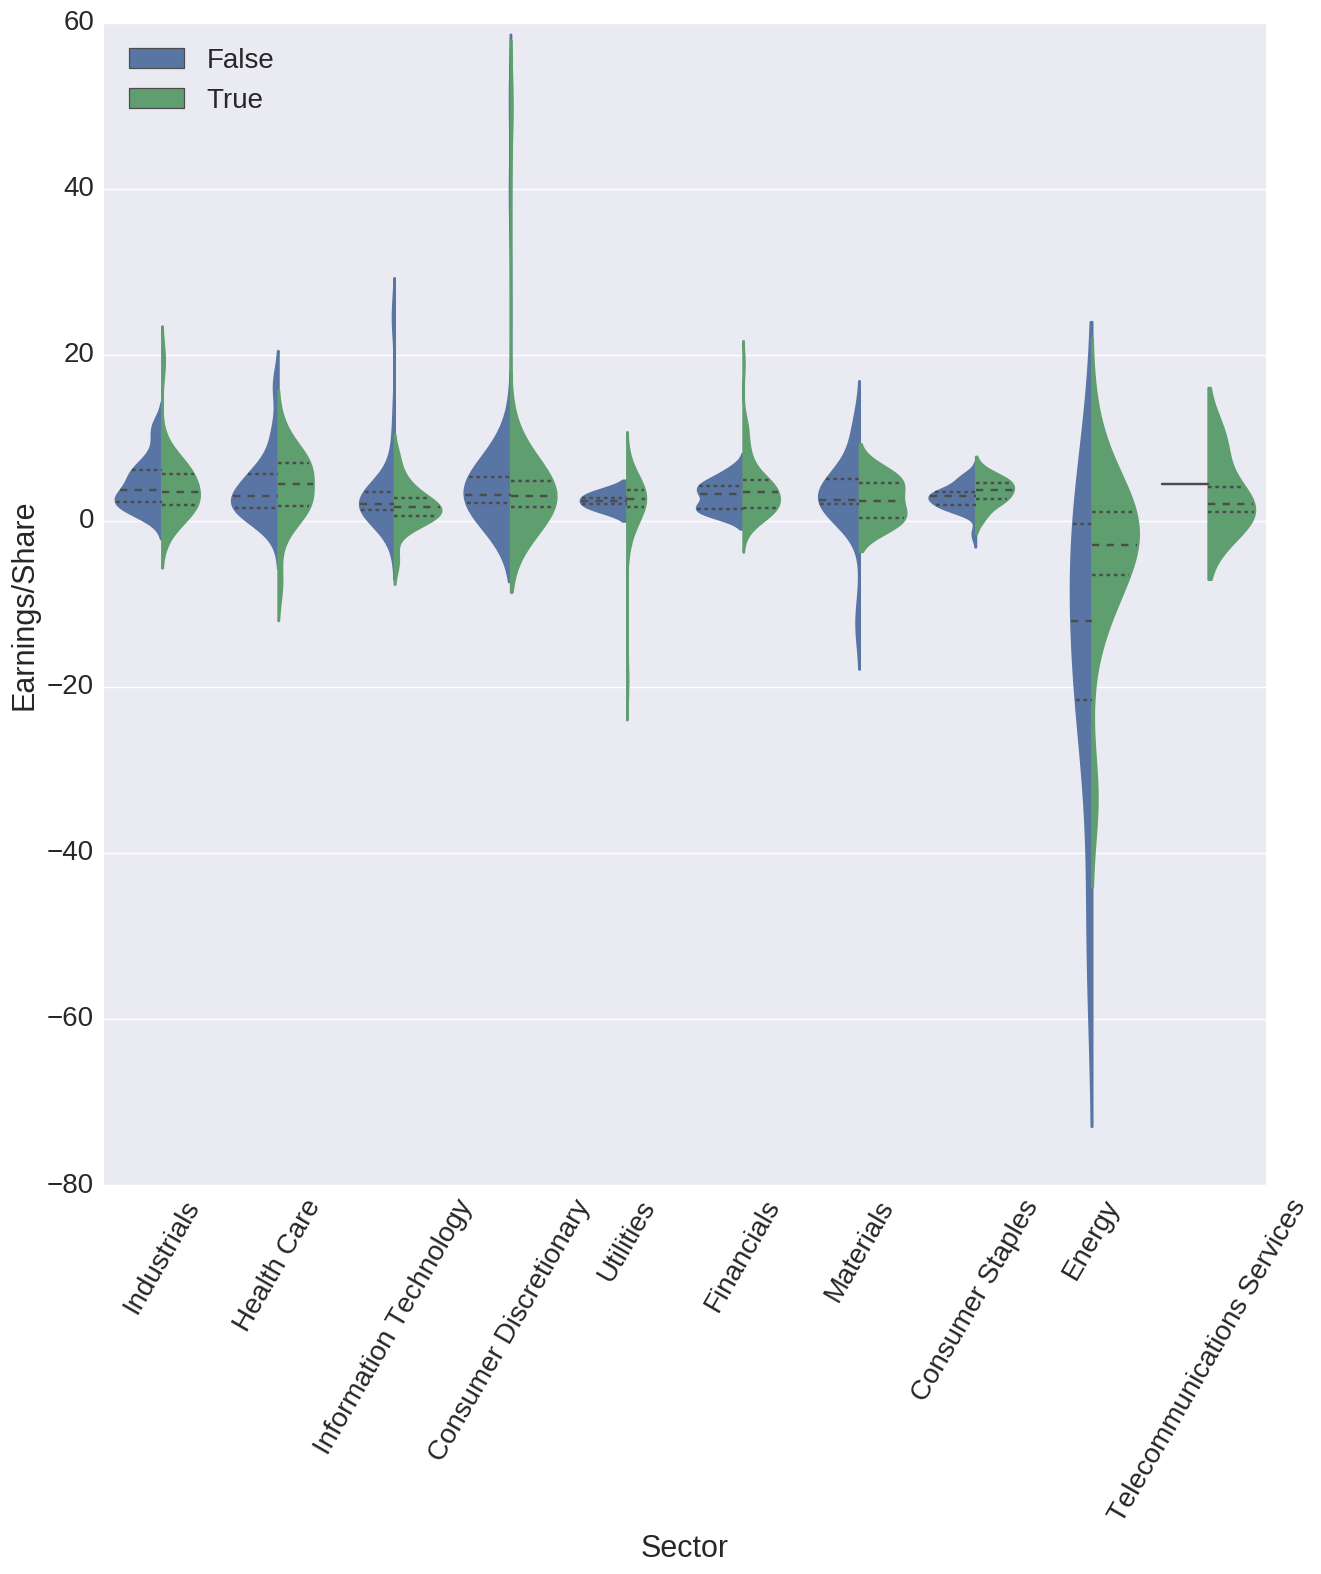

In [77]:
fig, ax = plt.subplots(figsize=(15, 15))

ax = sns.violinplot(x="Sector", 
                    y="Earnings/Share", 
                    hue="aBuy", 
                    data=df_imputed, 
                    split=True, 
                    inner="quart")

plt.legend(loc=2);
plt.xticks(rotation=60);